## Business Problem

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

## Import Necessary Libraries

In [77]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')

## Import the Data Set

In [78]:
glass_df= pd.read_csv('glass.csv')
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Data Exploration

In [79]:
glass_df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

No missing data so all the entries are valid for use.

## Descriptive Analysis

In [80]:
glass_df.shape

(214, 10)

In [81]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [82]:
glass_df[glass_df.duplicated()].shape

(1, 10)

In [83]:
glass_df[glass_df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [84]:
glass_df.drop_duplicates(inplace=True)

In [85]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The features are not on the same scale. For example Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale.

In [86]:
glass_df["Type"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [87]:
glass_df['Type'].value_counts().sort_index(ascending=True)

1    69
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

##### The dataset is pretty unbalanced. The instances of types 1 and 2 constitute more than 67 % of the glass types.

## Data Visualization

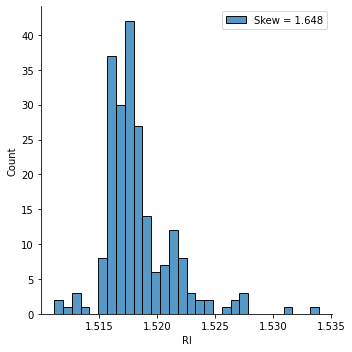

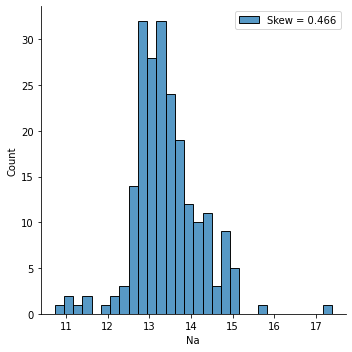

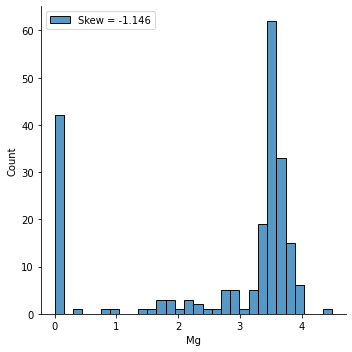

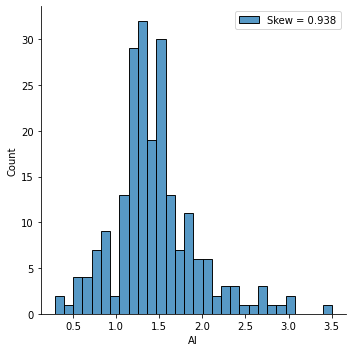

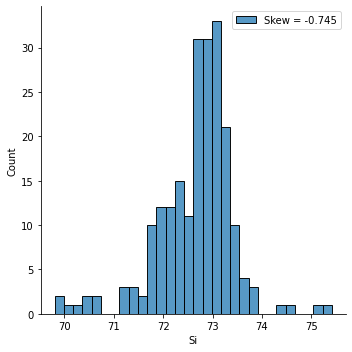

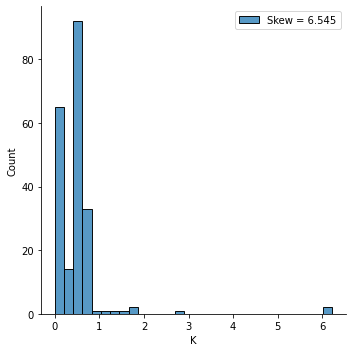

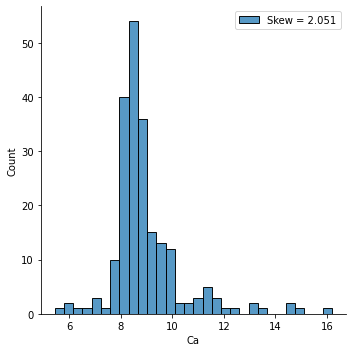

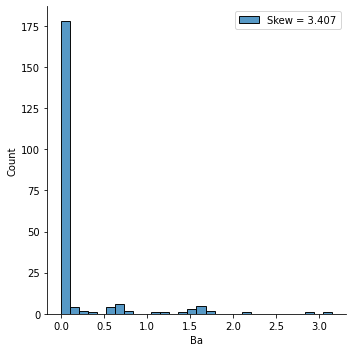

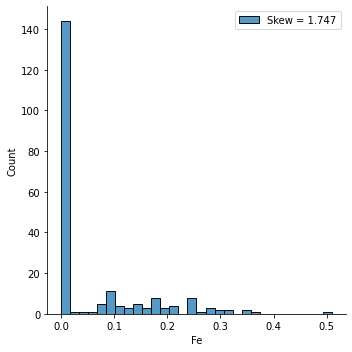

In [88]:
features = glass_df.columns[:-1].tolist()
for feat in features:
    skew= glass_df[feat].skew()
    sns.displot(glass_df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc= "best")
    plt.show()

None of the features is normally distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. Moreover, the distribution of potassium (K) and Barium (Ba) seem to contain many outliers. Let's identify the indices of the observations containing outliers using Turkey's method.

In [89]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(glass_df[features])))) 

The dataset contains 14 observations with more than 2 outliers


Aha! there exists some 14 observations with multiple outliers. 

These could harm the efficiency of our learning algorithms. We'll make sure to get rid of these in the next sections.
Let's examine the boxplots for the several distributions

In [90]:
#Let's examine the boxplots for the several distributions

In [91]:
list(glass_df)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

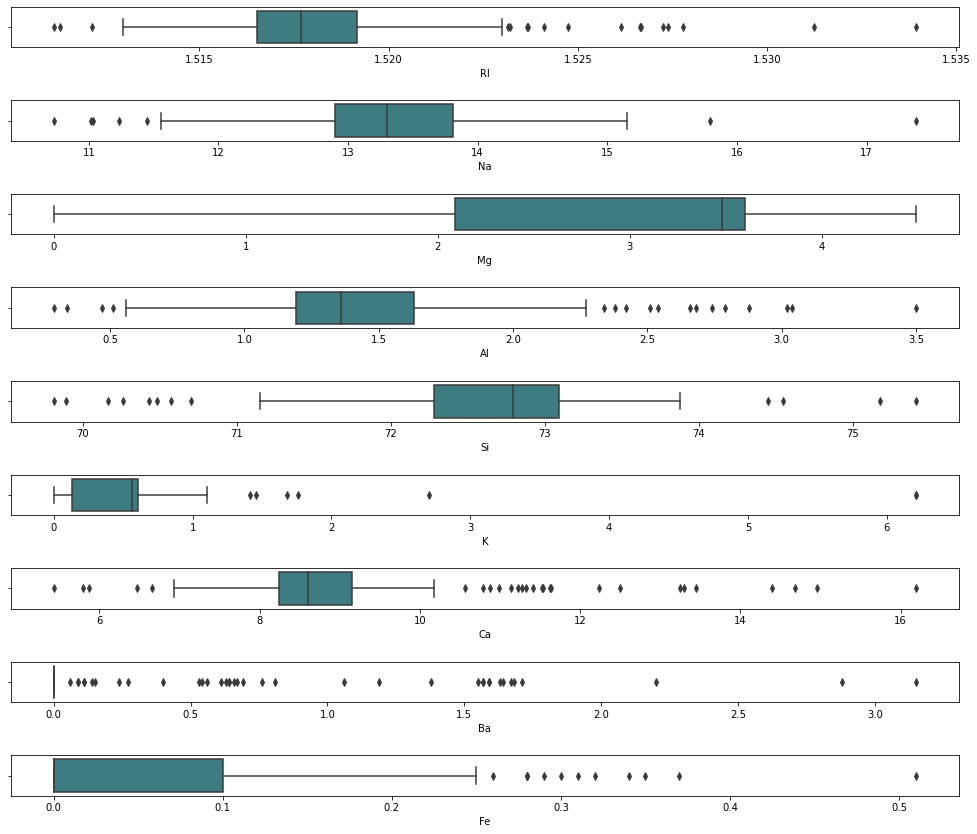

In [92]:
fig, axes= plt.subplots(9,1,figsize=(14,12),sharex= False, sharey=False)
sns.boxplot(x= 'RI', data=glass_df, palette= 'crest', ax=axes[0])
sns.boxplot(x='Na', data= glass_df, palette='crest', ax=axes[1])
sns.boxplot(x='Mg', data= glass_df, palette='crest', ax=axes[2])
sns.boxplot(x='Al', data= glass_df, palette='crest', ax=axes[3])
sns.boxplot(x='Si', data= glass_df, palette='crest', ax=axes[4])
sns.boxplot(x='K', data= glass_df, palette='crest', ax=axes[5])
sns.boxplot(x='Ca', data= glass_df, palette='crest', ax=axes[6])
sns.boxplot(x='Ba', data= glass_df, palette='crest', ax=axes[7])
sns.boxplot(x='Fe', data= glass_df, palette='crest', ax=axes[8])
plt.tight_layout(pad=2.2)
plt.show()

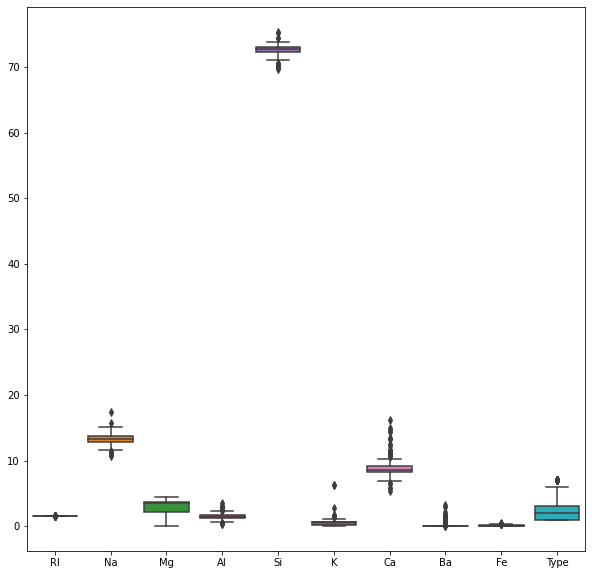

In [93]:
#outlier
plt.figure(figsize=(10,10))
sns.boxplot(data=glass_df, orient="v");

Unsurprisingly, Silicon has a mean that is much superior to the other constituents as we already saw in the previous section. Well, that is normal since glass is mainly based on silica.

### Multivariate Analysis

Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

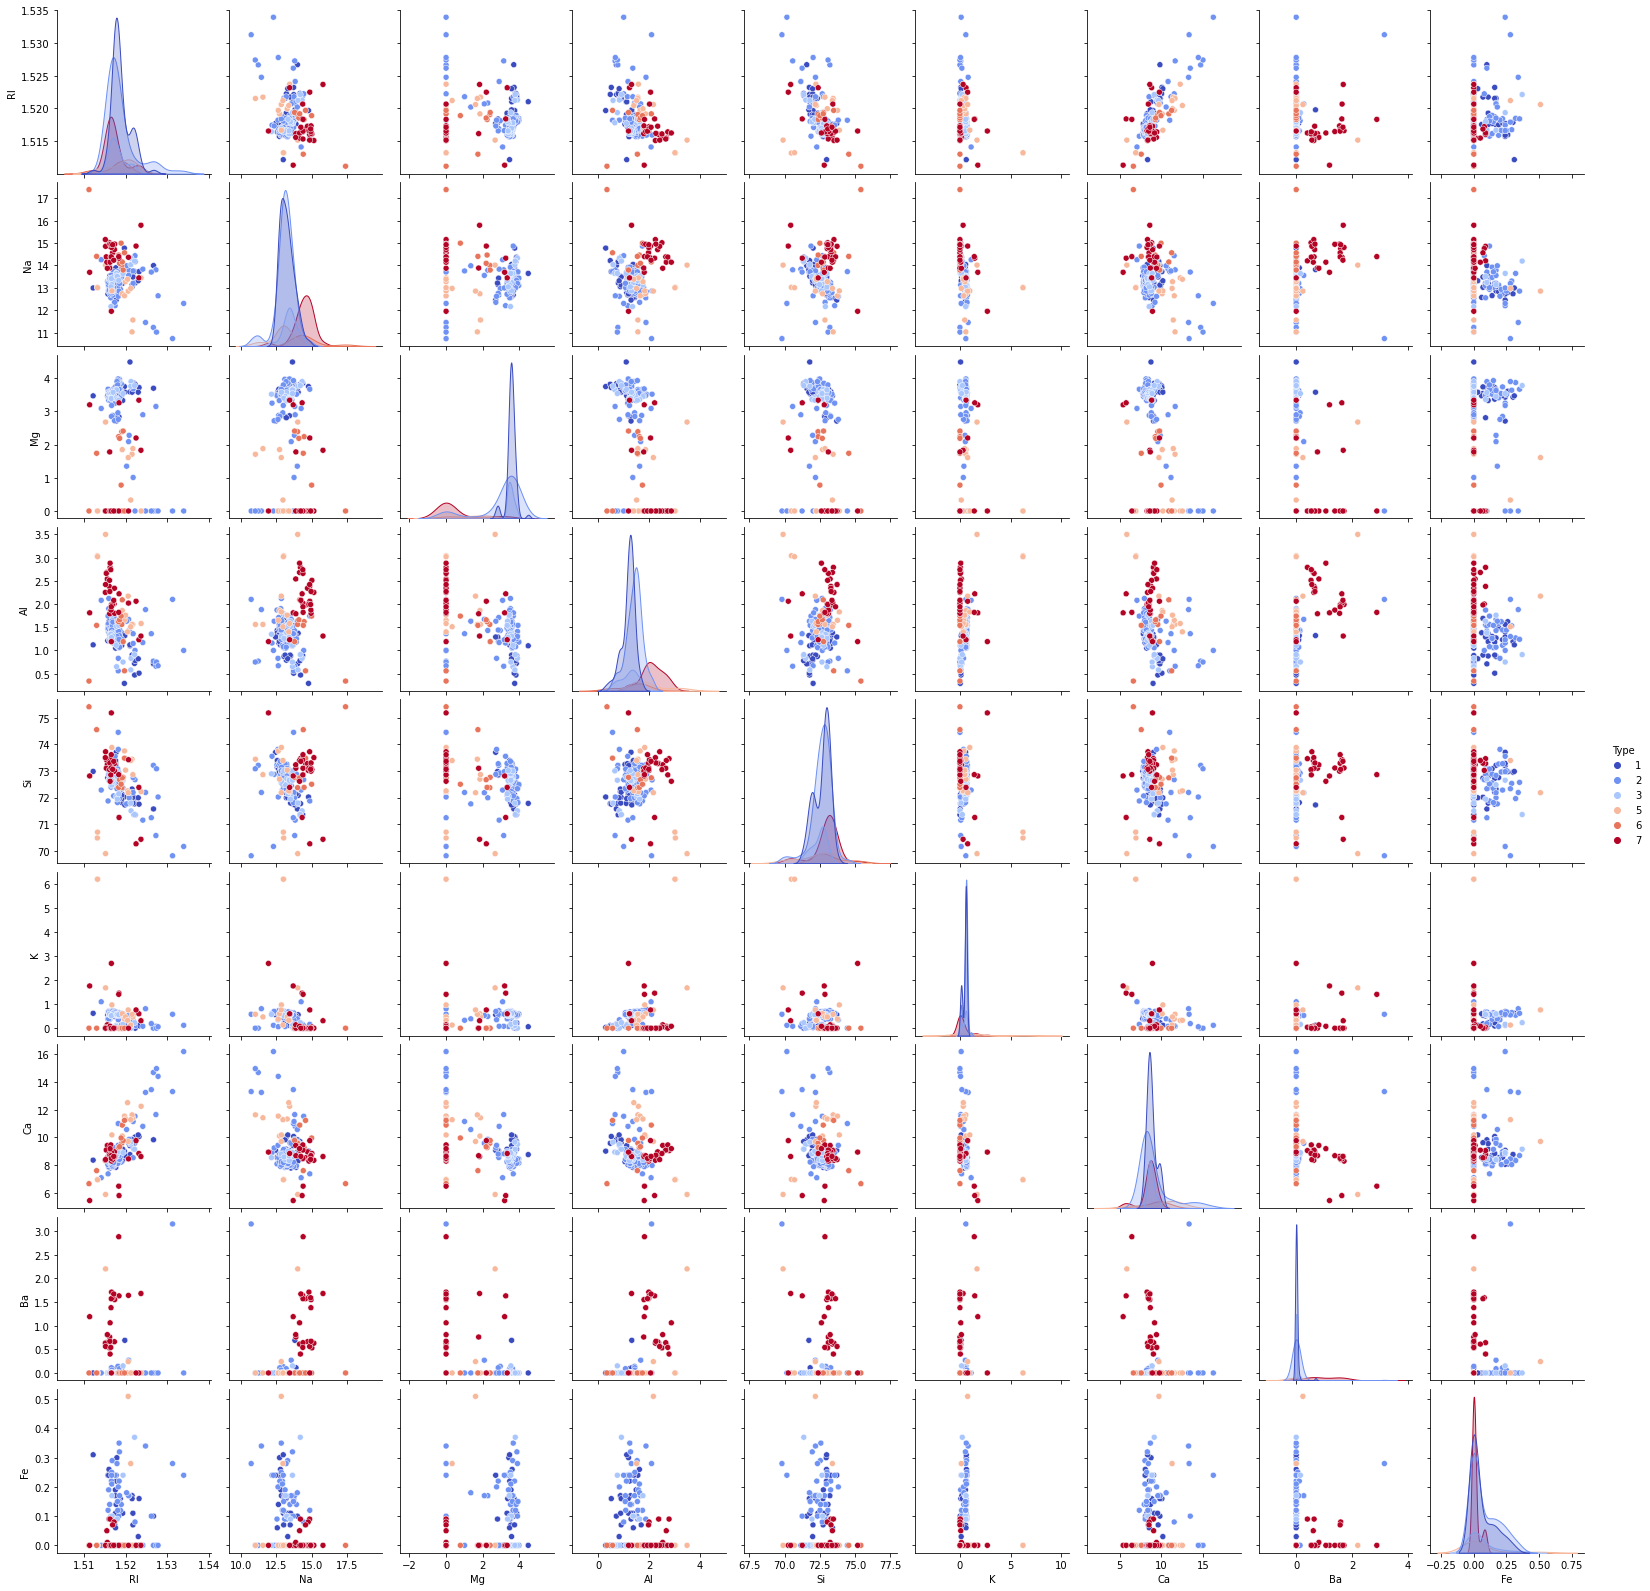

In [94]:
sns.pairplot(glass_df,hue ='Type', palette='coolwarm' )
plt.show()

<AxesSubplot:>

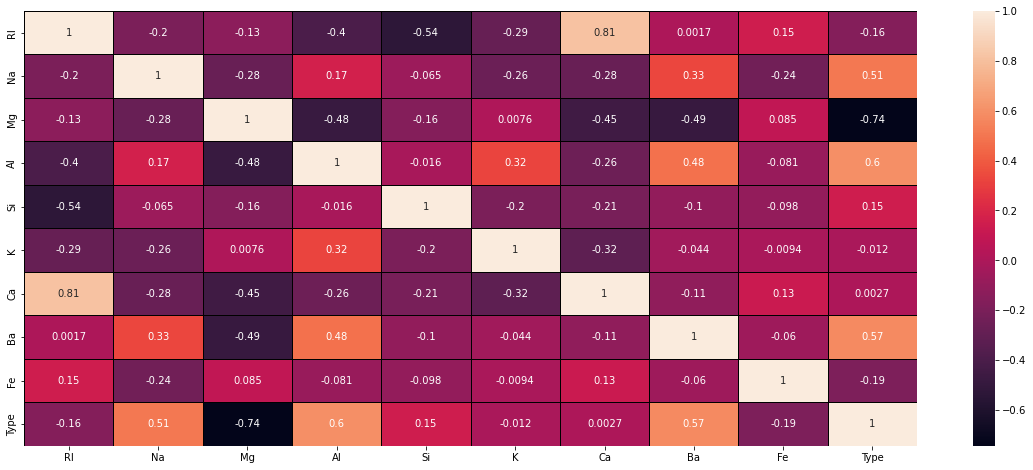

In [95]:
# Having a look at the correlation matrix
plt.figure(figsize=(20,8))
sns.heatmap(glass_df.corr(), annot=True, linewidths=0.5, linecolor='black')

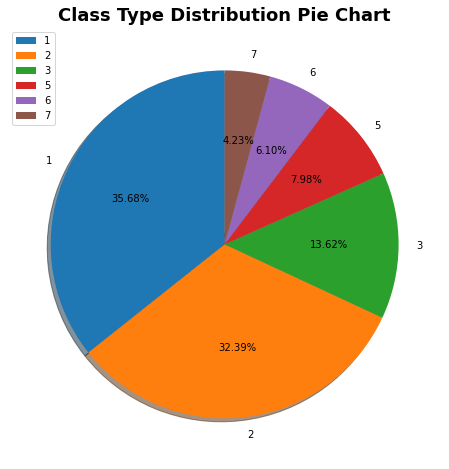

In [96]:
plt.figure(figsize=(12,8))
plt.pie(glass_df['Type'].value_counts(),labels=glass_df['Type'].unique(),autopct= '%.2f%%',shadow=True,
    labeldistance=1.1,
    startangle=90,
    radius=1,
    counterclock=True,)
plt.legend(loc= 'upper left')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

## Data Pre-Processing

###### Hunting and removing multiple outliers Let's remove the observations containing multiple outliers with the function we created in the previous section.

In [97]:
outlier_indices = outlier_hunt(glass_df[features])
df= glass_df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)
df.head()

(199, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Removing observations with multiple outliers (more than 2) leaves us with 200 observations to learn from. Let's now see how our distributions look like.


## Test Train Split and Cross Validation methods

In [102]:
x = df.drop('Type',axis=1)
y = df[['Type']]

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [60]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (139, 9)
Shape of X_test:  (60, 9)
Shape of y_train:  (139, 1)
Shape of y_test (60, 1)


### Standardize the Variables

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## How to Choose the Value of K

#### Grid Search for Choosing the value of K

In [107]:
#to get best number of neighbors
kfold = KFold(n_splits=7)
n_neighbors = np.array(range(1,20))               #get accuracy scores for 1<=k<=40, and select the one with highest accuracy.
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv =10)
grid.fit(x, y)

print(grid.best_score_)
print(grid.best_params_)

0.6634210526315789
{'n_neighbors': 3}


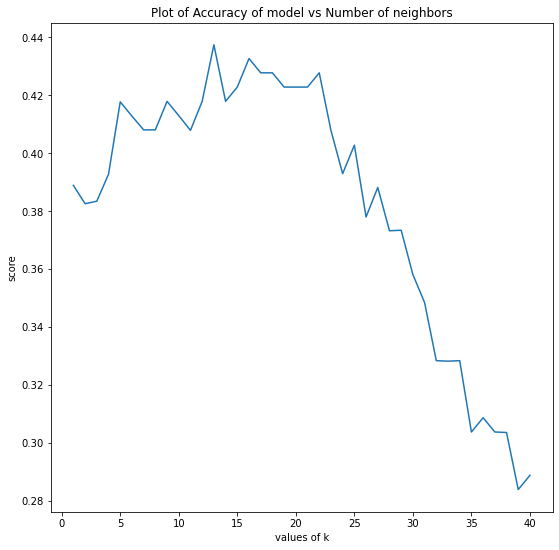

In [108]:
#Visual Representation

#get scores for k between 1 to 41
k_range=range(1,41)
k_score = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x,y ,cv=kfold)
  k_score.append(scores.mean())
#plot score to k
plt.plot(k_range, k_score)  
plt.xlabel("values of k")
plt.ylabel("score")
plt.title("Plot of Accuracy of model vs Number of neighbors")
plt.show()

In [109]:
# NOW WITH K=3
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[18  4  0  0  0  0]
 [ 6 12  0  1  0  0]
 [ 6  0  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]


              precision    recall  f1-score   support

           1       0.60      0.82      0.69        22
           2       0.71      0.63      0.67        19
           3       0.00      0.00      0.00         6
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.70        60
   macro avg       0.68      0.70      0.68        60
weighted avg       0.64      0.70      0.66        60



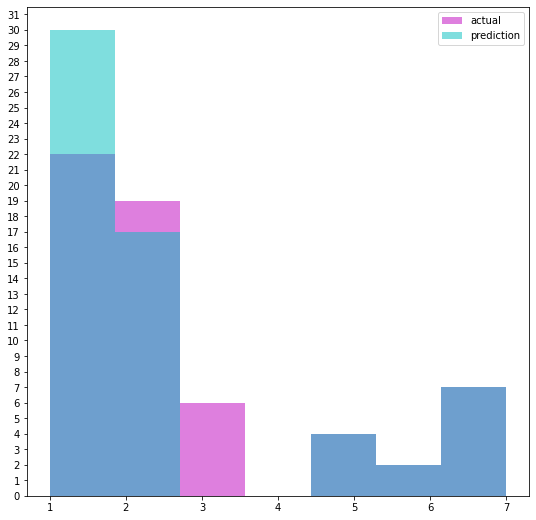

In [110]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,32))
ax.legend(loc = 'best')
plt.show()

In [114]:
# Fitting classifier to the Training set
from sklearn.pipeline import Pipeline
classifier_knn = KNeighborsClassifier()
steps = [
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [115]:
parameters = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,11,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}
classifier_knn = GridSearchCV(knn_pipe, parameters, cv = 10)
classifier_knn = classifier_knn.fit(x_train, y_train.values.ravel())

In [116]:
y_pred_knn_train = classifier_knn.predict(x_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set Accuracy: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(x_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set Accuracy: ", accuracy_knn_test)

Training set Accuracy:  1.0
Test set Accuracy:  0.7833333333333333


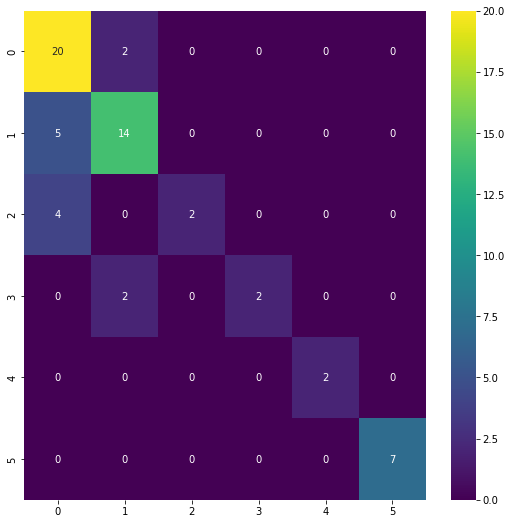

In [117]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

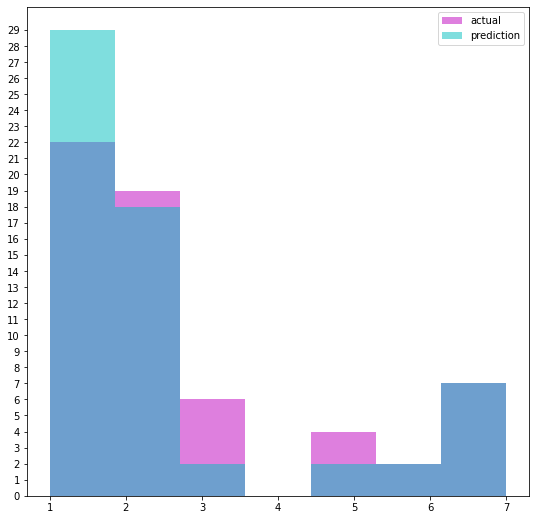

In [118]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred_knn_test, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

#### The duplicated values and the outliers were removed from the dataset,

#### Standard Scaler was used to scaled on the train and test data

#### Grid Serach was used to find the optimal k value for the KNN algorithm

#### The accuracy of KNN models was greater when, n=3

## =========================================================================================================================================================